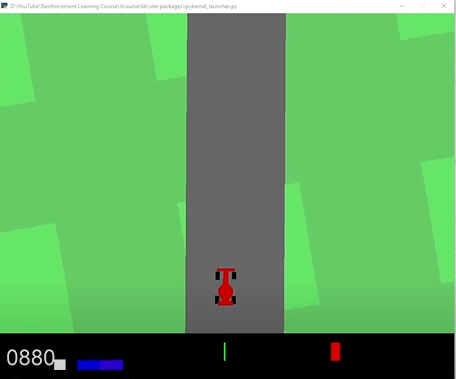

# 1. Import Dependencies

In [1]:
!pip install ufal.pybox2d

In [2]:
!pip install pyglet

### Ignore the all the warning

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
import gym 
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import VecFrameStack
from stable_baselines3.common.evaluation import evaluate_policy
import os

In [5]:
from gym import spaces
import numpy as np
import pygame

# 2. Test Environment

In [6]:
environment_name = "CarRacing-v2"

In [7]:
env = gym.make(environment_name)

In [8]:
env.reset()

(array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        ...,
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]], dtype=uint8),
 {})

In [9]:
env.action_space

Box([-1.  0.  0.], 1.0, (3,), float32)

In [10]:
env.observation_space

Box(0, 255, (96, 96, 3), uint8)

In [11]:
env.render()

In [12]:
env.close()

In [13]:
episodes = 5

for episode in range(1, episodes + 1):
    state = env.reset()
    done = False
    score = 0 
    
    while not done:
        env.render()
        action = env.action_space.sample()
        step_result = env.step(action)
        
        # Unpack the first four elements, ignore the rest
        n_state, reward, done, info, _ = step_result
        score += reward
    
    print('Episode:{} Score:{}'.format(episode, score))

Episode:1 Score:-867.013043478367
Episode:2 Score:-875.3941176471669
Episode:3 Score:-888.7658862877366
Episode:4 Score:-883.8950530036436
Episode:5 Score:-851.0941176471614


In [14]:
env.close()

In [15]:
env.action_space

Box([-1.  0.  0.], 1.0, (3,), float32)

In [16]:
env.action_space.sample()

array([0.9899741 , 0.966195  , 0.44078892], dtype=float32)

In [17]:
env.observation_space

Box(0, 255, (96, 96, 3), uint8)

In [18]:
env.observation_space.sample()

array([[[ 64, 219,   9],
        [ 36, 176,   4],
        [198,  47, 133],
        ...,
        [247, 238,   1],
        [ 74, 221, 170],
        [ 14,   5, 251]],

       [[ 55, 109, 239],
        [ 31,  93, 205],
        [ 12, 116,  30],
        ...,
        [105, 242,  30],
        [169, 109, 134],
        [  3, 110,  72]],

       [[108, 216, 148],
        [  7, 126, 171],
        [106,  56, 134],
        ...,
        [221, 134,  33],
        [213,  97, 183],
        [ 46, 155, 241]],

       ...,

       [[166, 168, 240],
        [ 29,  55,  65],
        [176, 171,  78],
        ...,
        [186, 233, 155],
        [152, 186, 240],
        [140,  44,  81]],

       [[149, 143, 149],
        [114,  48, 143],
        [237, 160,  13],
        ...,
        [108, 173, 255],
        [ 15, 218, 254],
        [ 98,  56,  40]],

       [[241,  33,  23],
        [220, 150,  63],
        [253, 187, 139],
        ...,
        [186, 254, 200],
        [179,  57, 112],
        [151,   6,  27]]

# 3. Train Model

In [19]:
log_path = os.path.join('Training', 'Logs')

In [22]:
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3 import PPO

# Assuming `env` is your CarRacing environment
env = DummyVecEnv([lambda: env])
model = PPO("MultiInputPolicy", env, verbose=1, tensorboard_log=log_path, policy_kwargs=dict(features_extractor_kwargs=dict(observation_space=observation_space)))

AttributeError: 'CarRacing' object has no attribute 'num_envs'

In [ ]:
# train a model on 40000 timesteps
model.learn(total_timesteps=40000)

# 4. Save Model

In [ ]:
ppo_path = os.path.join('Training', 'Saved Models', 'PPO_Driving_model')

In [ ]:
model.save(ppo_path)

In [ ]:
del model

In [ ]:
model = PPO.load(ppo_path,env)

# 5. Evaluate and Test

In [ ]:
evaluate_policy(model, env, n_eval_episodes=10, render=True)
# return average reward and standard deviation

In [ ]:
env.close()

In [ ]:
episodes = 5

for episode in range(1, episodes + 1):
    state = env.reset()
    done = False
    score = 0 
    
    while not done:
        env.render()
        action = env.action_space.sample()
        step_result = env.step(action)
        
        # Unpack the first four elements, ignore the rest
        n_state, reward, done, info, _ = step_result
        score += reward
    
    print('Episode:{} Score:{}'.format(episode, score))

env.close()

# Increase the performance by using 428k steps model

In [ ]:
ppo_path = os.path.join('Training', 'Saved Models', 'PPO_428k_Driving_model')
model = PPO.load(ppo_path,env)

In [ ]:
evaluate_policy(model, env, n_eval_episodes=10, render=True)
# return average reward and standard deviation

In [ ]:
env.close()

In [ ]:
episodes = 5

for episode in range(1, episodes + 1):
    state = env.reset()
    done = False
    score = 0 
    
    while not done:
        env.render()
        action = env.action_space.sample()
        step_result = env.step(action)
        
        # Unpack the first four elements, ignore the rest
        n_state, reward, done, info, _ = step_result
        score += reward
    
    print('Episode:{} Score:{}'.format(episode, score))

env.close()